In [1]:
# **Part 1 -> Data Preprocessing**

# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the training set
#     We train the RNN only on our test set, its like the test set doens't exist for RNN
df_train = pd.read_csv('Recurrent_Neural_Networks/Google_Stock_Price_Train.csv')

#     Contains the input data of the neural network
training_set = df_train.iloc[:, 1:2].values  # We add 2 just to make it a numpy array and not a vector

# Feature Scaling
#     Its recommended to use NORMALIZATION in RNN when we have sigmoid as our activation function for the
#     output layer
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
#     Recommended to keep training set unaltered
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
#     60 timesteps means that at each time t the RNN is going to look at 60 stock prices
#     i.e stock prices between 60 days before time t and time t
#     Based on the trends it will predict the output at time t+1

X_train = []  #Contains 60 stock prices before that financial day
y_train = []  #Contain the stock price of the next financial day

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60: i, 0]) #we've only 1 columns(but : makes it 3d) so we use 0
    y_train.append(training_set_scaled[i, 0])

#     X_train and y_train are LISTS but we need arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
#     Adding some more dimensionality to the data structure
#     It is the unit that is the number of predictors we can use to predict what we want
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # 1 indicates the no. of indicators

#   This is imp if we want to add some more indicators or do some more robust financial engineering


In [2]:
#  ***Part 2 -> Building the RNN***
#     We're going to build a stacked LSTM with some dropout regularization to prevent overfitting

# import warnings
# warnings.filterwarnings("ignore")


# Importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# Initializing the RNN as a sequence of layers
#     We will use computational graphs and build them using PyTorch later

regressor = Sequential()

# Adding the 1st LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))) # contains the last 2 dims
regressor.add(Dropout(0.2))

# Adding the 2nd LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the 3rd LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the 4th LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50)) #its by default false
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(1, activation = 'sigmoid'))

# Compiling the RNN
# regressor.compile(optimizer= 'rmsprop', loss = 'mean_squared_error')
regressor.compile(optimizer= 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the training set
regressor.fit(X_train, y_train, epochs= 100, batch_size= 32)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0300
Epoch 2/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0045
Epoch 3/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0032
Epoch 4/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0025
Epoch 5/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0026
Epoch 6/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0026
Epoch 7/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0024
Epoch 8/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0020
Epoch 9/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0021
Epoch 10/

1198/1198 [==============================] - 6s 5ms/step - loss: 8.0133e-04
Epoch 86/100
1198/1198 [==============================] - 6s 5ms/step - loss: 8.0080e-04
Epoch 87/100
1198/1198 [==============================] - 4s 3ms/step - loss: 8.3563e-04
Epoch 88/100
1198/1198 [==============================] - 4s 3ms/step - loss: 9.3534e-04
Epoch 89/100
1198/1198 [==============================] - 4s 3ms/step - loss: 7.6922e-04
Epoch 90/100
1198/1198 [==============================] - 4s 3ms/step - loss: 7.8219e-04
Epoch 91/100
1198/1198 [==============================] - 4s 3ms/step - loss: 8.0434e-04
Epoch 92/100
1198/1198 [==============================] - 4s 3ms/step - loss: 8.3350e-04
Epoch 93/100
1198/1198 [==============================] - 4s 3ms/step - loss: 7.5552e-04
Epoch 94/100
1198/1198 [==============================] - 4s 3ms/step - loss: 8.2709e-04
Epoch 95/100
1198/1198 [==============================] - 4s 3ms/step - loss: 7.4778e-04
Epoch 96/100
1198/1198 [==========

In [3]:
# ***Part 3 -> Predicting and Visualizing the results***

#     Getting the real stock price of 2017
df_test = pd.read_csv('Recurrent_Neural_Networks/Google_Stock_Price_Test.csv')
real_stock_price = df_test.iloc[:, 1:2].values

#     Getting the predicted stock price of 2017
#     Now for getting the stock prices of previous 60 days, we'll need some days from Jan 2017 
#     and some from Nov,Dec 2016
#     So for that we need to concatenate the two datasets

#     We will need to scale the test set but the problem is that we will change the actual test set and we should 
#     never do this

#     So, to overcome this we'll concatenate the original dataframes and then scale only the inputs and 
#     not the actual test values
df_total = pd.concat((df_train['Open'], df_test['Open']), axis= 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predictiing
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


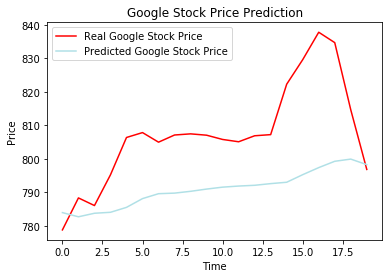

In [4]:
# Visualizing the Results
#     Witness the robustness of our model

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'powderblue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()